In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score,classification_report,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

import math
import torch
from torch import nn
from torch import optim
from torchvision.datasets import MNIST
from torch.utils.data import TensorDataset, DataLoader

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.utils.data as utils
from torch.optim import Adam 

In [3]:
transform = transforms.Compose([
transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

In [4]:
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(784, 200))
model.add_module('r1' , nn.ReLU())
model.add_module('l2', nn.Linear(200, 200))
model.add_module('r2' , nn.ReLU())
model.add_module('l3', nn.Linear(200, 10))

model.to(device)

Sequential(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (r1): ReLU()
  (l2): Linear(in_features=200, out_features=200, bias=True)
  (r2): ReLU()
  (l3): Linear(in_features=200, out_features=10, bias=True)
)

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

In [40]:
model.train()
step = 0 
loss_history = []
for epoch in range(1, 5):
    for batch_idx, (data, target) in enumerate(trainloader):
        data, target = data.to(device), target.to(device)
        data = data.view(data.size(0), -1)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        step += 1
        loss_history.append(loss.item())
        if step % 100  == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} '.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))
    scheduler.step()

Train Epoch: 1 [396/60000 (1%)]	Loss: 2.536647 
Train Epoch: 1 [796/60000 (1%)]	Loss: 1.652239 
Train Epoch: 1 [1196/60000 (2%)]	Loss: 0.558652 
Train Epoch: 1 [1596/60000 (3%)]	Loss: 0.089300 
Train Epoch: 1 [1996/60000 (3%)]	Loss: 0.607783 
Train Epoch: 1 [2396/60000 (4%)]	Loss: 0.114001 
Train Epoch: 1 [2796/60000 (5%)]	Loss: 0.015863 
Train Epoch: 1 [3196/60000 (5%)]	Loss: 0.280412 
Train Epoch: 1 [3596/60000 (6%)]	Loss: 0.106683 
Train Epoch: 1 [3996/60000 (7%)]	Loss: 0.114483 
Train Epoch: 1 [4396/60000 (7%)]	Loss: 0.401883 
Train Epoch: 1 [4796/60000 (8%)]	Loss: 0.111195 
Train Epoch: 1 [5196/60000 (9%)]	Loss: 0.974043 
Train Epoch: 1 [5596/60000 (9%)]	Loss: 1.423350 
Train Epoch: 1 [5996/60000 (10%)]	Loss: 0.086252 
Train Epoch: 1 [6396/60000 (11%)]	Loss: 0.010157 
Train Epoch: 1 [6796/60000 (11%)]	Loss: 0.649553 
Train Epoch: 1 [7196/60000 (12%)]	Loss: 0.046408 
Train Epoch: 1 [7596/60000 (13%)]	Loss: 0.284341 
Train Epoch: 1 [7996/60000 (13%)]	Loss: 0.046356 
Train Epoch: 1 [

Train Epoch: 3 [9196/60000 (15%)]	Loss: 0.083820 
Train Epoch: 3 [9596/60000 (16%)]	Loss: 0.000162 
Train Epoch: 3 [9996/60000 (17%)]	Loss: 0.042289 
Train Epoch: 3 [10396/60000 (17%)]	Loss: 0.012163 
Train Epoch: 3 [10796/60000 (18%)]	Loss: 0.007758 
Train Epoch: 3 [11196/60000 (19%)]	Loss: 0.000041 
Train Epoch: 3 [11596/60000 (19%)]	Loss: 0.000079 
Train Epoch: 3 [11996/60000 (20%)]	Loss: 0.046024 
Train Epoch: 3 [12396/60000 (21%)]	Loss: 0.029601 
Train Epoch: 3 [12796/60000 (21%)]	Loss: 0.437918 
Train Epoch: 3 [13196/60000 (22%)]	Loss: 0.063730 
Train Epoch: 3 [13596/60000 (23%)]	Loss: 0.000141 
Train Epoch: 3 [13996/60000 (23%)]	Loss: 0.057580 
Train Epoch: 3 [14396/60000 (24%)]	Loss: 0.081133 
Train Epoch: 3 [14796/60000 (25%)]	Loss: 0.000859 
Train Epoch: 3 [15196/60000 (25%)]	Loss: 0.027105 
Train Epoch: 3 [15596/60000 (26%)]	Loss: 0.000895 
Train Epoch: 3 [15996/60000 (27%)]	Loss: 0.001087 
Train Epoch: 3 [16396/60000 (27%)]	Loss: 0.000396 
Train Epoch: 3 [16796/60000 (28%)]

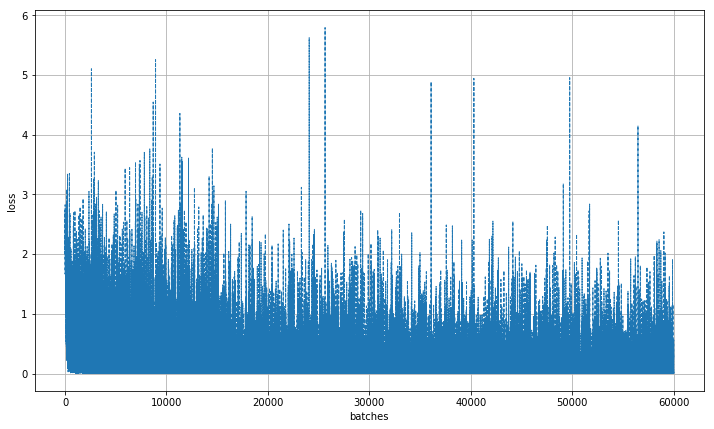

In [41]:
plt.figure(figsize=(12, 7))
plt.plot(np.arange(len(loss_history)), loss_history, lw=1, linestyle='--')
plt.xlabel('batches')
plt.ylabel('loss')
plt.grid()
plt.show()

In [42]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in trainloader:
        data, target = data.to(device), target.to(device)
        data = data.view(data.size(0), -1)
        output = model(data)
        test_loss += criterion(output, target).item()  # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(trainloader.dataset)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(trainloader.dataset),
    100. * correct / len(trainloader.dataset)))


Test set: Average loss: 0.0194, Accuracy: 58563/60000 (98%)



In [43]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(784, 200))
model.add_module('r1', nn.ReLU())
model.add_module('l2', nn.Linear(200, 200))
model.add_module('r2', nn.ReLU())
model.add_module('l3', nn.Linear(200, 200))
model.add_module('r3', nn.ReLU())
model.add_module('lf', nn.Linear(200, 10))

model.to(device)

Sequential(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (r1): ReLU()
  (l2): Linear(in_features=200, out_features=200, bias=True)
  (r2): ReLU()
  (l3): Linear(in_features=200, out_features=200, bias=True)
  (r3): ReLU()
  (lf): Linear(in_features=200, out_features=10, bias=True)
)

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

In [45]:
model.train()
step = 0 
loss_history = []
for epoch in range(1, 6):
    for batch_idx, (data, target) in enumerate(trainloader):
        data, target = data.to(device), target.to(device)
        data = data.view(data.size(0), -1)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        step += 1
        loss_history.append(loss.item())
        if step % 100  == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} '.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))
    scheduler.step()

Train Epoch: 1 [396/60000 (1%)]	Loss: 1.529073 
Train Epoch: 1 [796/60000 (1%)]	Loss: 0.292890 
Train Epoch: 1 [1196/60000 (2%)]	Loss: 0.690086 
Train Epoch: 1 [1596/60000 (3%)]	Loss: 0.311896 
Train Epoch: 1 [1996/60000 (3%)]	Loss: 0.497863 
Train Epoch: 1 [2396/60000 (4%)]	Loss: 1.007988 
Train Epoch: 1 [2796/60000 (5%)]	Loss: 0.643045 
Train Epoch: 1 [3196/60000 (5%)]	Loss: 0.909047 
Train Epoch: 1 [3596/60000 (6%)]	Loss: 0.334096 
Train Epoch: 1 [3996/60000 (7%)]	Loss: 0.259123 
Train Epoch: 1 [4396/60000 (7%)]	Loss: 0.111784 
Train Epoch: 1 [4796/60000 (8%)]	Loss: 0.371870 
Train Epoch: 1 [5196/60000 (9%)]	Loss: 0.084706 
Train Epoch: 1 [5596/60000 (9%)]	Loss: 0.083891 
Train Epoch: 1 [5996/60000 (10%)]	Loss: 0.120728 
Train Epoch: 1 [6396/60000 (11%)]	Loss: 0.298166 
Train Epoch: 1 [6796/60000 (11%)]	Loss: 0.264014 
Train Epoch: 1 [7196/60000 (12%)]	Loss: 0.674338 
Train Epoch: 1 [7596/60000 (13%)]	Loss: 0.014253 
Train Epoch: 1 [7996/60000 (13%)]	Loss: 1.873429 
Train Epoch: 1 [

Train Epoch: 3 [9196/60000 (15%)]	Loss: 0.000763 
Train Epoch: 3 [9596/60000 (16%)]	Loss: 0.002185 
Train Epoch: 3 [9996/60000 (17%)]	Loss: 0.002956 
Train Epoch: 3 [10396/60000 (17%)]	Loss: 0.001687 
Train Epoch: 3 [10796/60000 (18%)]	Loss: 0.009786 
Train Epoch: 3 [11196/60000 (19%)]	Loss: 0.001688 
Train Epoch: 3 [11596/60000 (19%)]	Loss: 0.000272 
Train Epoch: 3 [11996/60000 (20%)]	Loss: 0.005421 
Train Epoch: 3 [12396/60000 (21%)]	Loss: 0.000025 
Train Epoch: 3 [12796/60000 (21%)]	Loss: 0.085704 
Train Epoch: 3 [13196/60000 (22%)]	Loss: 0.000299 
Train Epoch: 3 [13596/60000 (23%)]	Loss: 0.000345 
Train Epoch: 3 [13996/60000 (23%)]	Loss: 0.017642 
Train Epoch: 3 [14396/60000 (24%)]	Loss: 0.167269 
Train Epoch: 3 [14796/60000 (25%)]	Loss: 0.000105 
Train Epoch: 3 [15196/60000 (25%)]	Loss: 0.061071 
Train Epoch: 3 [15596/60000 (26%)]	Loss: 0.008938 
Train Epoch: 3 [15996/60000 (27%)]	Loss: 0.002452 
Train Epoch: 3 [16396/60000 (27%)]	Loss: 0.028992 
Train Epoch: 3 [16796/60000 (28%)]

Train Epoch: 5 [17996/60000 (30%)]	Loss: 0.011493 
Train Epoch: 5 [18396/60000 (31%)]	Loss: 0.000126 
Train Epoch: 5 [18796/60000 (31%)]	Loss: 0.031334 
Train Epoch: 5 [19196/60000 (32%)]	Loss: 0.003705 
Train Epoch: 5 [19596/60000 (33%)]	Loss: 0.020965 
Train Epoch: 5 [19996/60000 (33%)]	Loss: 0.001109 
Train Epoch: 5 [20396/60000 (34%)]	Loss: 0.056572 
Train Epoch: 5 [20796/60000 (35%)]	Loss: 0.001192 
Train Epoch: 5 [21196/60000 (35%)]	Loss: 0.900409 
Train Epoch: 5 [21596/60000 (36%)]	Loss: 0.166607 
Train Epoch: 5 [21996/60000 (37%)]	Loss: 0.000006 
Train Epoch: 5 [22396/60000 (37%)]	Loss: 0.271020 
Train Epoch: 5 [22796/60000 (38%)]	Loss: 0.025964 
Train Epoch: 5 [23196/60000 (39%)]	Loss: 0.087095 
Train Epoch: 5 [23596/60000 (39%)]	Loss: 0.004574 
Train Epoch: 5 [23996/60000 (40%)]	Loss: 0.000333 
Train Epoch: 5 [24396/60000 (41%)]	Loss: 0.033821 
Train Epoch: 5 [24796/60000 (41%)]	Loss: 0.000301 
Train Epoch: 5 [25196/60000 (42%)]	Loss: 0.001266 
Train Epoch: 5 [25596/60000 (43

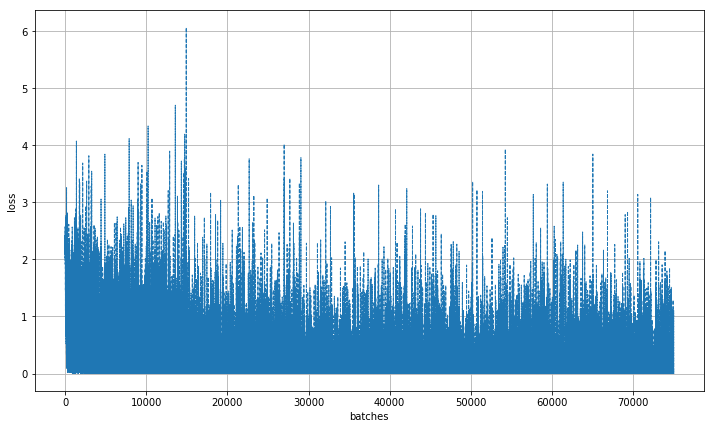

In [46]:
plt.figure(figsize=(12, 7))
plt.plot(np.arange(len(loss_history)), loss_history, lw=1, linestyle='--')
plt.xlabel('batches')
plt.ylabel('loss')
plt.grid()
plt.show()

In [47]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in trainloader:
        data, target = data.to(device), target.to(device)
        data = data.view(data.size(0), -1)
        output = model(data)
        test_loss += criterion(output, target).item()  # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(trainloader.dataset)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(trainloader.dataset),
    100. * correct / len(trainloader.dataset)))


Test set: Average loss: 0.0217, Accuracy: 58360/60000 (97%)



In [48]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(784, 200))
model.add_module('r1', nn.ReLU())
model.add_module('l2', nn.Linear(200, 200))
model.add_module('r2', nn.ReLU())
model.add_module('l3', nn.Linear(200, 200))
model.add_module('r3', nn.ReLU())
model.add_module('lf', nn.Linear(200, 10))

model.to(device)



Sequential(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (r1): ReLU()
  (l2): Linear(in_features=200, out_features=200, bias=True)
  (r2): ReLU()
  (l3): Linear(in_features=200, out_features=200, bias=True)
  (r3): ReLU()
  (lf): Linear(in_features=200, out_features=10, bias=True)
)

In [49]:
def train_eval(model , trainloader):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

    model.train()
    step = 0 
    loss_history = []
    for epoch in range(1, 6):
        for batch_idx, (data, target) in enumerate(trainloader):
            data, target = data.to(device), target.to(device)
            data = data.view(data.size(0), -1)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            step += 1
            loss_history.append(loss.item())
            if step % 1000  == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} '.format(
                    epoch, batch_idx * len(data), len(trainloader.dataset),
                    100. * batch_idx / len(trainloader), loss.item()))
        scheduler.step()
        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in trainloader:
                data, target = data.to(device), target.to(device)
                data = data.view(data.size(0), -1)
                output = model(data)
                test_loss += criterion(output, target).item()  # sum up batch loss
                pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
                correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(trainloader.dataset)

        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(trainloader.dataset),
            100. * correct / len(trainloader.dataset)))

In [50]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(784, 200))
model.add_module('r1', nn.ReLU())
model.add_module('l2', nn.Linear(200, 200))
model.add_module('r2', nn.ReLU())
model.add_module('l3', nn.Linear(200, 200))
model.add_module('r3', nn.ReLU())
model.add_module('l4', nn.Linear(200, 200))
model.add_module('r4', nn.ReLU())
model.add_module('lf', nn.Linear(200, 10))

model.to(device)

train_eval(model , trainloader)

Train Epoch: 1 [3996/60000 (7%)]	Loss: 0.065260 
Train Epoch: 1 [7996/60000 (13%)]	Loss: 2.542295 
Train Epoch: 1 [11996/60000 (20%)]	Loss: 0.014256 
Train Epoch: 1 [15996/60000 (27%)]	Loss: 0.094201 
Train Epoch: 1 [19996/60000 (33%)]	Loss: 0.014279 
Train Epoch: 1 [23996/60000 (40%)]	Loss: 0.089290 
Train Epoch: 1 [27996/60000 (47%)]	Loss: 1.938410 
Train Epoch: 1 [31996/60000 (53%)]	Loss: 0.058673 
Train Epoch: 1 [35996/60000 (60%)]	Loss: 0.114613 
Train Epoch: 1 [39996/60000 (67%)]	Loss: 0.623667 
Train Epoch: 1 [43996/60000 (73%)]	Loss: 0.293878 
Train Epoch: 1 [47996/60000 (80%)]	Loss: 0.802755 
Train Epoch: 1 [51996/60000 (87%)]	Loss: 0.077871 
Train Epoch: 1 [55996/60000 (93%)]	Loss: 0.024774 
Train Epoch: 1 [59996/60000 (100%)]	Loss: 0.091565 

Test set: Average loss: 0.0975, Accuracy: 52833/60000 (88%)

Train Epoch: 2 [3996/60000 (7%)]	Loss: 0.198556 
Train Epoch: 2 [7996/60000 (13%)]	Loss: 0.000893 
Train Epoch: 2 [11996/60000 (20%)]	Loss: 0.007136 
Train Epoch: 2 [15996/600

In [51]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(784, 200))
model.add_module('r1', nn.ReLU())
model.add_module('l2', nn.Linear(200, 200))
model.add_module('r2', nn.ReLU())
model.add_module('l3', nn.Linear(200, 200))
model.add_module('r3', nn.ReLU())
model.add_module('l4', nn.Linear(200, 200))
model.add_module('r4', nn.ReLU())
model.add_module('l5', nn.Linear(200, 200))
model.add_module('r5', nn.ReLU())
model.add_module('lf', nn.Linear(200, 10))

model.to(device)

train_eval(model , trainloader)

Train Epoch: 1 [3996/60000 (7%)]	Loss: 0.750397 
Train Epoch: 1 [7996/60000 (13%)]	Loss: 1.737949 
Train Epoch: 1 [11996/60000 (20%)]	Loss: 0.168545 
Train Epoch: 1 [15996/60000 (27%)]	Loss: 0.008867 
Train Epoch: 1 [19996/60000 (33%)]	Loss: 0.305343 
Train Epoch: 1 [23996/60000 (40%)]	Loss: 1.684041 
Train Epoch: 1 [27996/60000 (47%)]	Loss: 0.904169 
Train Epoch: 1 [31996/60000 (53%)]	Loss: 0.009762 
Train Epoch: 1 [35996/60000 (60%)]	Loss: 0.189032 
Train Epoch: 1 [39996/60000 (67%)]	Loss: 0.587353 
Train Epoch: 1 [43996/60000 (73%)]	Loss: 0.084859 
Train Epoch: 1 [47996/60000 (80%)]	Loss: 1.035193 
Train Epoch: 1 [51996/60000 (87%)]	Loss: 0.523587 
Train Epoch: 1 [55996/60000 (93%)]	Loss: 0.113464 
Train Epoch: 1 [59996/60000 (100%)]	Loss: 1.314958 

Test set: Average loss: 0.0932, Accuracy: 53296/60000 (89%)

Train Epoch: 2 [3996/60000 (7%)]	Loss: 0.005971 
Train Epoch: 2 [7996/60000 (13%)]	Loss: 0.261389 
Train Epoch: 2 [11996/60000 (20%)]	Loss: 0.104137 
Train Epoch: 2 [15996/600

In [52]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(784, 200))
model.add_module('r1', nn.ReLU())
model.add_module('l2', nn.Linear(200, 200))
model.add_module('r2', nn.ReLU())
model.add_module('l3', nn.Linear(200, 200))
model.add_module('r3', nn.ReLU())
model.add_module('l4', nn.Linear(200, 200))
model.add_module('r4', nn.ReLU())
model.add_module('l5', nn.Linear(200, 200))
model.add_module('r5', nn.ReLU())
model.add_module('l6', nn.Linear(200, 200))
model.add_module('r6', nn.ReLU())
model.add_module('lf', nn.Linear(200, 10))

model.to(device)

train_eval(model , trainloader)

Train Epoch: 1 [3996/60000 (7%)]	Loss: 1.999244 
Train Epoch: 1 [7996/60000 (13%)]	Loss: 0.144555 
Train Epoch: 1 [11996/60000 (20%)]	Loss: 0.565900 
Train Epoch: 1 [15996/60000 (27%)]	Loss: 2.335661 
Train Epoch: 1 [19996/60000 (33%)]	Loss: 0.603456 
Train Epoch: 1 [23996/60000 (40%)]	Loss: 0.387025 
Train Epoch: 1 [27996/60000 (47%)]	Loss: 0.026728 
Train Epoch: 1 [31996/60000 (53%)]	Loss: 0.232689 
Train Epoch: 1 [35996/60000 (60%)]	Loss: 0.191108 
Train Epoch: 1 [39996/60000 (67%)]	Loss: 0.006730 
Train Epoch: 1 [43996/60000 (73%)]	Loss: 0.344547 
Train Epoch: 1 [47996/60000 (80%)]	Loss: 0.444965 
Train Epoch: 1 [51996/60000 (87%)]	Loss: 0.318493 
Train Epoch: 1 [55996/60000 (93%)]	Loss: 0.036415 
Train Epoch: 1 [59996/60000 (100%)]	Loss: 0.653487 

Test set: Average loss: 0.0754, Accuracy: 54728/60000 (91%)

Train Epoch: 2 [3996/60000 (7%)]	Loss: 0.011480 
Train Epoch: 2 [7996/60000 (13%)]	Loss: 0.912650 
Train Epoch: 2 [11996/60000 (20%)]	Loss: 0.001257 
Train Epoch: 2 [15996/600

In [53]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(784, 200))
model.add_module('r1', nn.ReLU())
model.add_module('l2', nn.Linear(200, 200))
model.add_module('r2', nn.ReLU())
model.add_module('l3', nn.Linear(200, 200))
model.add_module('r3', nn.ReLU())
model.add_module('l4', nn.Linear(200, 200))
model.add_module('r4', nn.ReLU())
model.add_module('l5', nn.Linear(200, 200))
model.add_module('r5', nn.ReLU())
model.add_module('l6', nn.Linear(200, 200))
model.add_module('r6', nn.ReLU())
model.add_module('l7', nn.Linear(200, 200))
model.add_module('r7', nn.ReLU())
model.add_module('lf', nn.Linear(200, 10))

model.to(device)

train_eval(model , trainloader)

Train Epoch: 1 [3996/60000 (7%)]	Loss: 0.375396 
Train Epoch: 1 [7996/60000 (13%)]	Loss: 1.177147 
Train Epoch: 1 [11996/60000 (20%)]	Loss: 1.291902 
Train Epoch: 1 [15996/60000 (27%)]	Loss: 0.260338 
Train Epoch: 1 [19996/60000 (33%)]	Loss: 0.112823 
Train Epoch: 1 [23996/60000 (40%)]	Loss: 0.139016 
Train Epoch: 1 [27996/60000 (47%)]	Loss: 0.127446 
Train Epoch: 1 [31996/60000 (53%)]	Loss: 0.145677 
Train Epoch: 1 [35996/60000 (60%)]	Loss: 0.570164 
Train Epoch: 1 [39996/60000 (67%)]	Loss: 1.534598 
Train Epoch: 1 [43996/60000 (73%)]	Loss: 0.028125 
Train Epoch: 1 [47996/60000 (80%)]	Loss: 1.830807 
Train Epoch: 1 [51996/60000 (87%)]	Loss: 0.215642 
Train Epoch: 1 [55996/60000 (93%)]	Loss: 0.416237 
Train Epoch: 1 [59996/60000 (100%)]	Loss: 0.111651 

Test set: Average loss: 0.1843, Accuracy: 49377/60000 (82%)

Train Epoch: 2 [3996/60000 (7%)]	Loss: 0.046858 
Train Epoch: 2 [7996/60000 (13%)]	Loss: 0.052247 
Train Epoch: 2 [11996/60000 (20%)]	Loss: 0.003020 
Train Epoch: 2 [15996/600

In [54]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(784, 200))
model.add_module('r1', nn.ReLU())
model.add_module('l2', nn.Linear(200, 200))
model.add_module('r2', nn.ReLU())
model.add_module('l3', nn.Linear(200, 200))
model.add_module('r3', nn.ReLU())
model.add_module('l4', nn.Linear(200, 200))
model.add_module('r4', nn.ReLU())
model.add_module('l5', nn.Linear(200, 200))
model.add_module('r5', nn.ReLU())
model.add_module('l6', nn.Linear(200, 200))
model.add_module('r6', nn.ReLU())
model.add_module('l7', nn.Linear(200, 200))
model.add_module('r7', nn.ReLU())
model.add_module('l8', nn.Linear(200, 200))
model.add_module('r8', nn.ReLU())
model.add_module('lf', nn.Linear(200, 10))

model.to(device)

train_eval(model , trainloader)

Train Epoch: 1 [3996/60000 (7%)]	Loss: 1.019774 
Train Epoch: 1 [7996/60000 (13%)]	Loss: 1.574038 
Train Epoch: 1 [11996/60000 (20%)]	Loss: 1.706730 
Train Epoch: 1 [15996/60000 (27%)]	Loss: 0.202828 
Train Epoch: 1 [19996/60000 (33%)]	Loss: 2.128596 
Train Epoch: 1 [23996/60000 (40%)]	Loss: 0.994251 
Train Epoch: 1 [27996/60000 (47%)]	Loss: 1.422433 
Train Epoch: 1 [31996/60000 (53%)]	Loss: 0.675574 
Train Epoch: 1 [35996/60000 (60%)]	Loss: 0.497955 
Train Epoch: 1 [39996/60000 (67%)]	Loss: 1.460159 
Train Epoch: 1 [43996/60000 (73%)]	Loss: 0.026182 
Train Epoch: 1 [47996/60000 (80%)]	Loss: 0.314626 
Train Epoch: 1 [51996/60000 (87%)]	Loss: 0.051802 
Train Epoch: 1 [55996/60000 (93%)]	Loss: 0.122387 
Train Epoch: 1 [59996/60000 (100%)]	Loss: 0.353934 

Test set: Average loss: 0.1019, Accuracy: 52760/60000 (88%)

Train Epoch: 2 [3996/60000 (7%)]	Loss: 0.069732 
Train Epoch: 2 [7996/60000 (13%)]	Loss: 0.066718 
Train Epoch: 2 [11996/60000 (20%)]	Loss: 0.407114 
Train Epoch: 2 [15996/600

In [18]:
num_hid_l= np.linspace(1,7,7)
acc = [  58563/60000,58360/60000,58124/60000 , 57770/60000 , 57226/60000  ,56205/60000,56065/60000]

In [19]:
len(num_hid_l)

7

In [20]:
num_hid_l

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.])

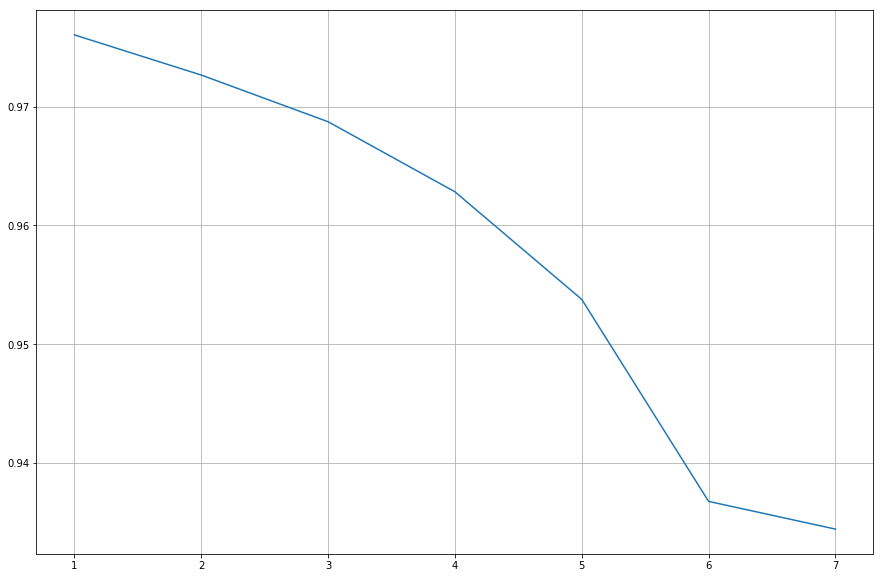

In [25]:
plt.figure(figsize=(15,10))
plt.plot(num_hid_l , acc)
plt.grid()
plt.show()